In [17]:
import os
import sys
sys.path.append("../../../")

from rnns_architectures.intrinsec import *

sys.path.append("../")
import utils_plots

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import pickle
import random, os, json
import time

import warnings
warnings.filterwarnings("ignore")

# RESULTS (PERFORMANCE)

# GRU

## Step 1. Model output

In [2]:
directory = './Results_GRU_Had'
def load_from_pickle(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

y_pred_by_split = {}

for i in range(1,4):
    split_filename = os.path.join(directory, f'split_{i}', f'y_pred_split_{i}.pkl')
    y_pred_by_split[str(i)] = load_from_pickle(split_filename)

## Step 2. Analysis of results

In [3]:
all_metrics = []
norm = 'robustNorm'
n_time_steps = 8

for i in [1, 2, 3]: 
    y_test = pd.read_csv("../../../DATA/CIRCULATORY/s" + str(i) + "/y_test_tensor_"+norm+".csv")[['individualMRGerm']].values
    y_test = y_test.reshape(y_test.shape[0] // n_time_steps, n_time_steps)
    y_test_df = pd.DataFrame(y_test)
    
    y_pred = y_pred_by_split[str(i)].squeeze()
    y_pred_df = pd.DataFrame(y_pred)

    df_metrics = utils_plots.get_metrics_over_time(n_time_steps, y_test_df, y_pred_df)
    all_metrics.append(df_metrics)

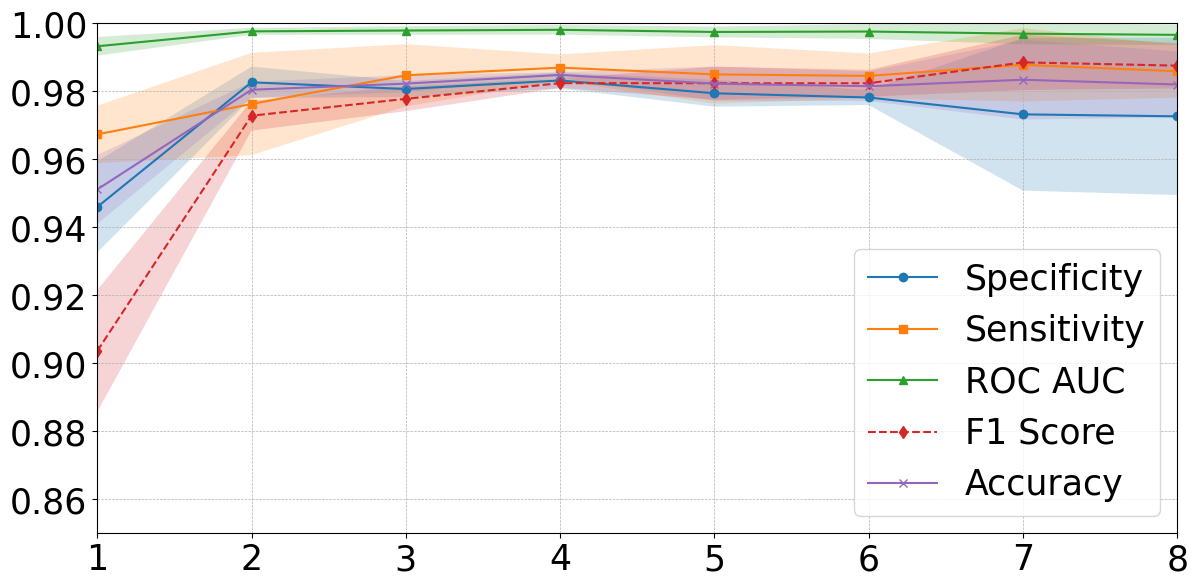

In [4]:
save_img = False
utils_plots.plot1_metrics_over_time(all_metrics, n_time_steps, '../Figures/INTRINSIC/Performance_GRU_Had.pdf', save_img)

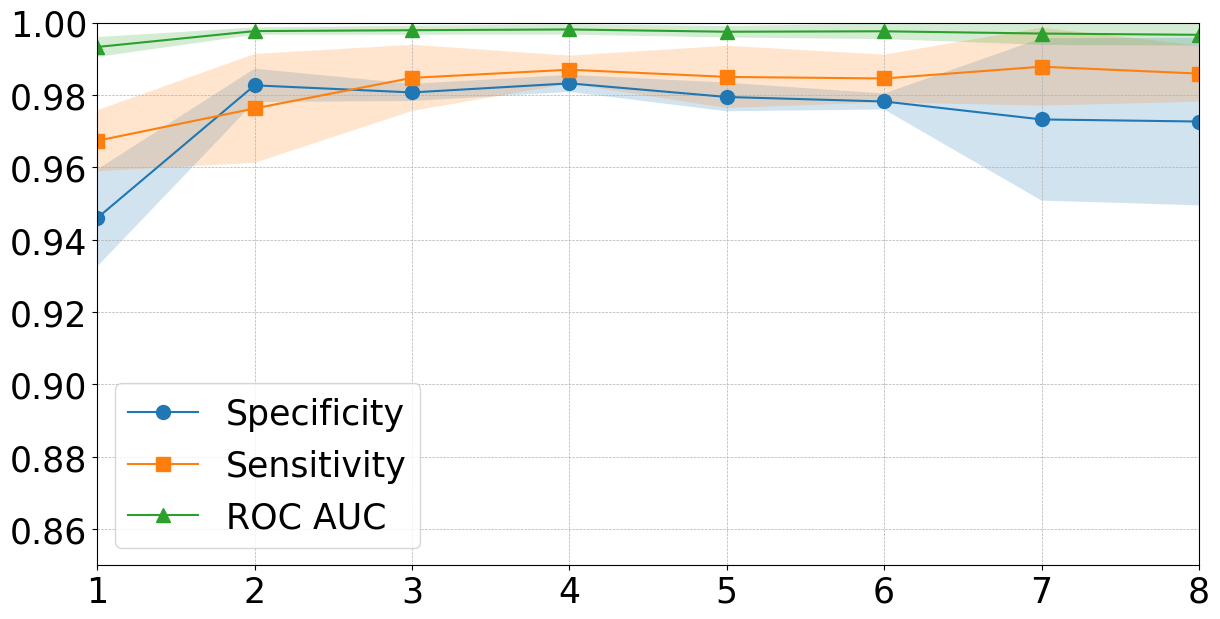

In [5]:
save_img = True
utils_plots.plot2_metrics_over_time(all_metrics, n_time_steps, '../Figures/INTRINSIC/Performance_GRU_Had.pdf', save_img)

## Save results (metrics)

In [6]:
metrics_GRUHad = pd.concat(all_metrics)
metrics_GRUHad.to_csv(f'{directory}/metrics_GRU_Had.csv', index=False)

# LSTM

In [7]:
directory = './Results_LSTM_Had'
def load_from_pickle(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

y_pred_by_split = {}

for i in range(1,4):
    split_filename = os.path.join(directory, f'split_{i}', f'y_pred_split_{i}.pkl')
    y_pred_by_split[str(i)] = load_from_pickle(split_filename)

In [8]:
all_metrics = []
norm = 'robustNorm'
n_time_steps = 8

for i in [1, 2, 3]: 
    y_test = pd.read_csv("../../../DATA/CIRCULATORY/s" + str(i) + "/y_test_tensor_"+norm+".csv")[['individualMRGerm']].values
    y_test = y_test.reshape(y_test.shape[0] // n_time_steps, n_time_steps)
    y_test_df = pd.DataFrame(y_test)
    
    y_pred = y_pred_by_split[str(i)].squeeze()
    y_pred_df = pd.DataFrame(y_pred)

    df_metrics = utils_plots.get_metrics_over_time(n_time_steps, y_test_df, y_pred_df)
    all_metrics.append(df_metrics)

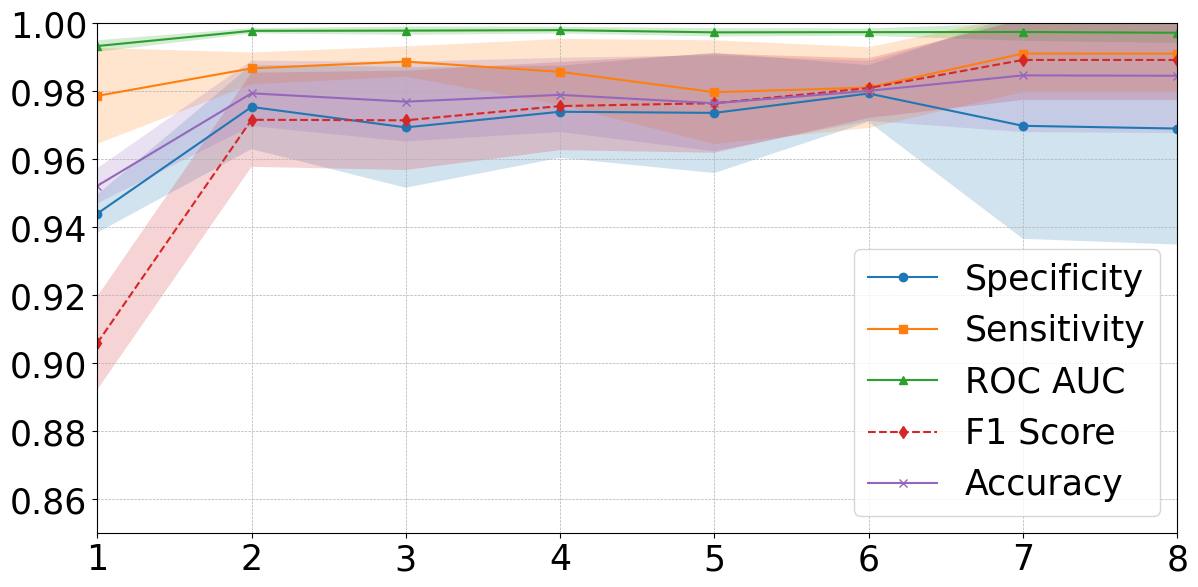

In [9]:
save_img = False
utils_plots.plot1_metrics_over_time(all_metrics, n_time_steps, '../Figures/INTRINSIC/Performance_LSTM_Had.pdf', save_img)

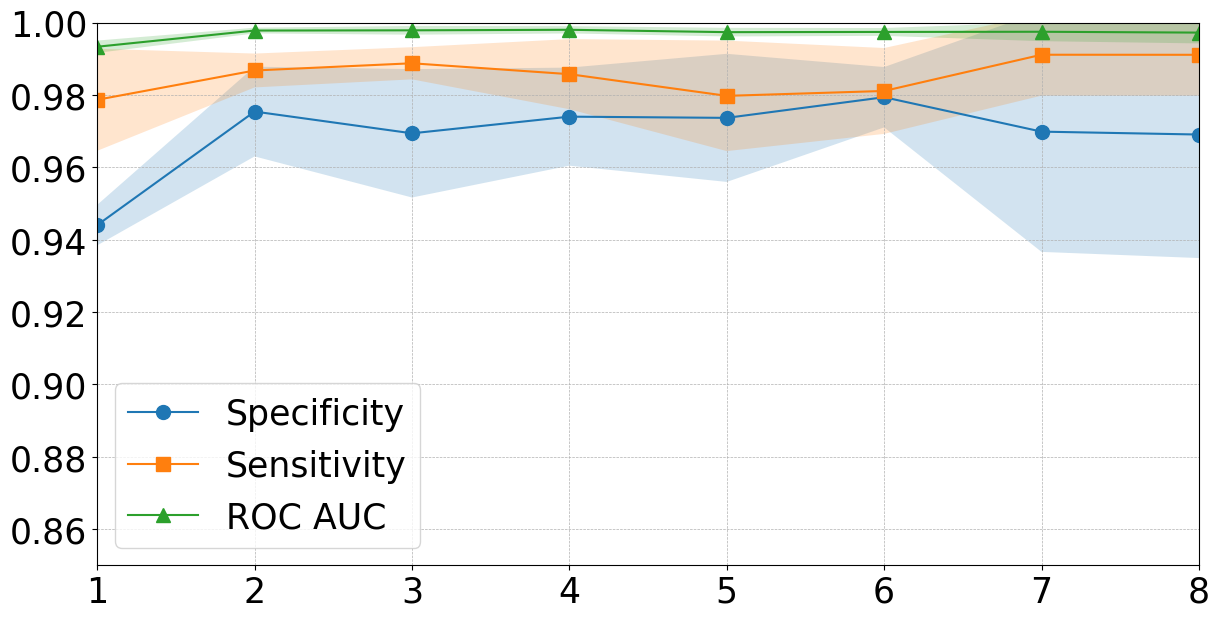

In [10]:
save_img = True
utils_plots.plot2_metrics_over_time(all_metrics, n_time_steps, '../Figures/INTRINSIC/Performance_LSTM_Had.pdf', save_img)

In [11]:
metrics_GRUHad = pd.concat(all_metrics)
metrics_GRUHad.to_csv(f'{directory}/metrics_LSTM_Had.csv', index=False)

# VANILLA

In [12]:
directory = './Results_Vanilla_Had'
def load_from_pickle(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

y_pred_by_split = {}

for i in range(1,4):
    split_filename = os.path.join(directory, f'split_{i}', f'y_pred_split_{i}.pkl')
    y_pred_by_split[str(i)] = load_from_pickle(split_filename)

In [13]:
all_metrics = []
norm = 'robustNorm'
n_time_steps = 8

for i in [1, 2, 3]: 
    y_test = pd.read_csv("../../../DATA/CIRCULATORY/s" + str(i) + "/y_test_tensor_"+norm+".csv")[['individualMRGerm']].values
    y_test = y_test.reshape(y_test.shape[0] // n_time_steps, n_time_steps)
    y_test_df = pd.DataFrame(y_test)
    
    y_pred = y_pred_by_split[str(i)].squeeze()
    y_pred_df = pd.DataFrame(y_pred)

    df_metrics = utils_plots.get_metrics_over_time(n_time_steps, y_test_df, y_pred_df)
    all_metrics.append(df_metrics)

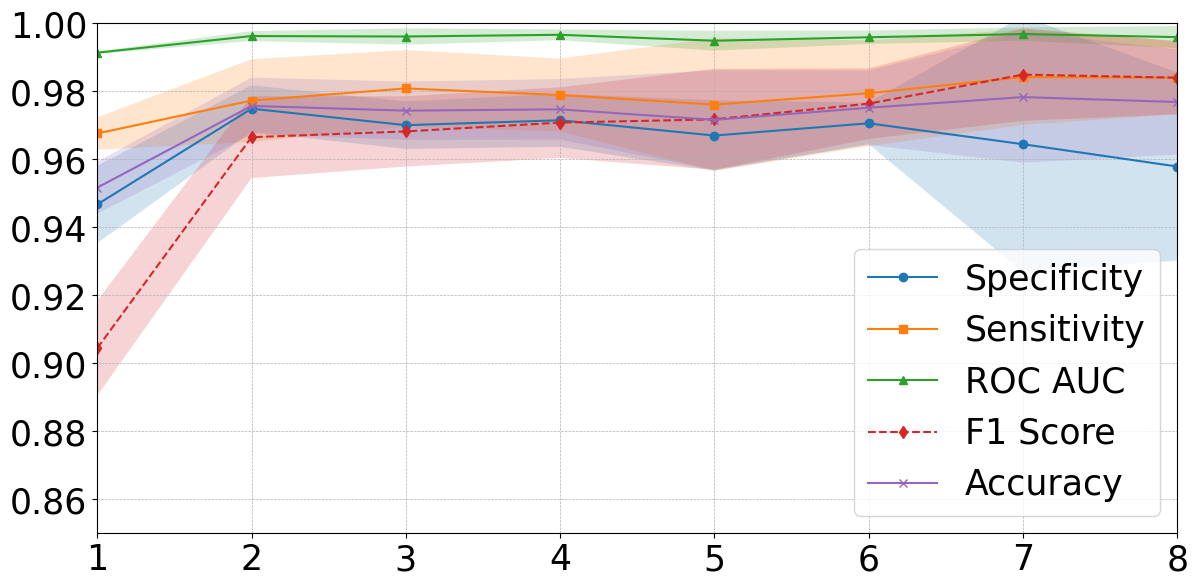

In [14]:
save_img = False
utils_plots.plot1_metrics_over_time(all_metrics, n_time_steps, '../Figures/INTRINSIC/Performance_Vanilla_Had.pdf', save_img)

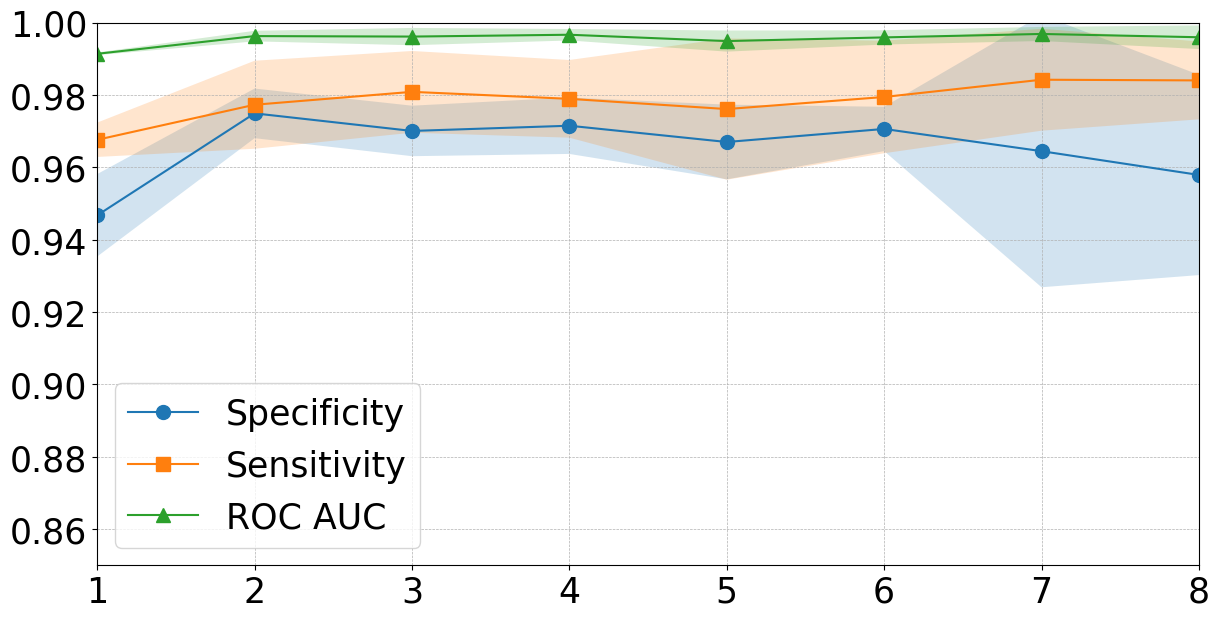

In [15]:
save_img = True
utils_plots.plot2_metrics_over_time(all_metrics, n_time_steps, '../Figures/INTRINSIC/Performance_Vanilla_Had.pdf', save_img)

In [16]:
metrics_GRUHad = pd.concat(all_metrics)
metrics_GRUHad.to_csv(f'{directory}/metrics_Vanilla_Had.csv', index=False)